In [22]:
##lasso regression
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [21]:
print(df.columns)

Index(['SEASON', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen',
       'Zambia', 'Zimbabwe',
       'occupied Palestinian territory, including east Jerusalem'],
      dtype='object', length=186)


In [27]:
df = pd.read_csv("build_country_week.csv")

#dropping
df = df.dropna(subset=['United States of America'])
y = df['United States of America']
X = df.drop(columns=['SEASON', 'United States of America'])
X = sm.add_constant(X)  ##need to add the intercept

#NaN values
X.replace([np.inf, -np.inf], np.nan, inplace=True)

#missing values which creates error
missing_threshold = 0.2 ##can i do this??
X = X.loc[:, X.isnull().mean() < missing_threshold]

X.dropna(inplace=True)

y = y.loc[X.index]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/_core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  return um.subtract(


In [51]:
##data check
print(f"After cleaning: {X.shape[0]} rows, {X.shape[1]} columns")
if X.shape[0] == 0:
    raise ValueError("No data left after cleaning. Adjust missing value thresholds.")

scaler = StandardScaler()
X.iloc[:, 1:] = scaler.fit_transform(X.iloc[:, 1:])  ##only to scale nonintercept columns

#LASSO
model = sm.OLS(y, X)
res = model.fit_regularized(method='elastic_net',
                            alpha=0.00001,     #do we need to change alpha?
                            L1_wt=1.0,     # LASSO (L1 only) - what does L1 mean?
                            refit=True)    

After cleaning: 6 rows, 122 columns


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [52]:
##non-zero coefficients
print("Non zero coeffs (predictors of US cases):")
for name, coef in zip(X.columns, res.params):
    if name == 'const' or abs(coef) < 1e-6:
        continue
    print(f" - {name}: {coef:.4f}")

#stats summary
non_zero_vars = [name for name, coef in zip(X.columns, res.params) if abs(coef) > 1e-6]
X_reduced = X[non_zero_vars]
model_refit = sm.OLS(y, X_reduced)
results_refit = model_refit.fit()

print("\nFull OLS Summary:")
print(results_refit.summary())

Non zero coeffs (predictors of US cases):
 - Afghanistan: 0.0004
 - Albania: 0.0001
 - Algeria: 0.0004
 - Argentina: 0.0021
 - Armenia: -0.0024
 - Austria: 0.0013
 - Azerbaijan: -0.0012
 - Bahrain: -0.0010
 - Bangladesh: -0.0022
 - Belarus: -0.0024
 - Belgium: 0.0005
 - Bhutan: -0.0004
 - Bolivia (Plurinational State of): 0.0015
 - Brazil: 0.0005
 - Bulgaria: 0.0012
 - Burkina Faso: 0.0024
 - Cambodia: 0.0012
 - Cameroon: 0.0026
 - Central African Republic: 0.0022
 - Chile: 0.0014
 - China: 0.0015
 - Colombia: 0.0012
 - Costa Rica: -0.0013
 - Croatia: -0.0004
 - Cuba: 0.0006
 - Côte d’Ivoire: 0.0020
 - Democratic Republic of the Congo: -0.0019
 - Denmark: 0.0009
 - Dominican Republic: -0.0003
 - Ecuador: 0.0008
 - Egypt: -0.0011
 - Fiji: -0.0021
 - Finland: 0.0016
 - French Guiana: 0.0029

Full OLS Summary:
                               OLS Regression Results                               
Dep. Variable:     United States of America   R-squared:                       1.000
Model:     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / s

Plotting coefficients:
French Guiana: 0.0029390125567007614
Cameroon: 0.0025556663137266625
Belarus: -0.0024018110906351693
Armenia: -0.0023590409300069614
Burkina Faso: 0.0023539176560382694
Central African Republic: 0.0022491037079336368
Bangladesh: -0.002200620663695859
Fiji: -0.0021229760593459504
Argentina: 0.002102734762447813
Côte d’Ivoire: 0.001961081556538012
Democratic Republic of the Congo: -0.0019089843416898382
Finland: 0.0015784546116595233
Bolivia (Plurinational State of): 0.0015458586311677316
China: 0.001500196279389447
Chile: 0.001420305185642756
Costa Rica: -0.0013303704668367446
Austria: 0.0012993721780922857
Cambodia: 0.0012454601417416873
Bulgaria: 0.0012379002062131057
Colombia: 0.0011737520143186202
Azerbaijan: -0.001159023809340242
Egypt: -0.0010563158929057723
Bahrain: -0.001023281117901861
Denmark: 0.0009025051665969633
Ecuador: 0.0007622558711397991
Cuba: 0.000645891506776259
Brazil: 0.0004970575563116274
Belgium: 0.00046212100544031033
Afghanistan: 0.000444

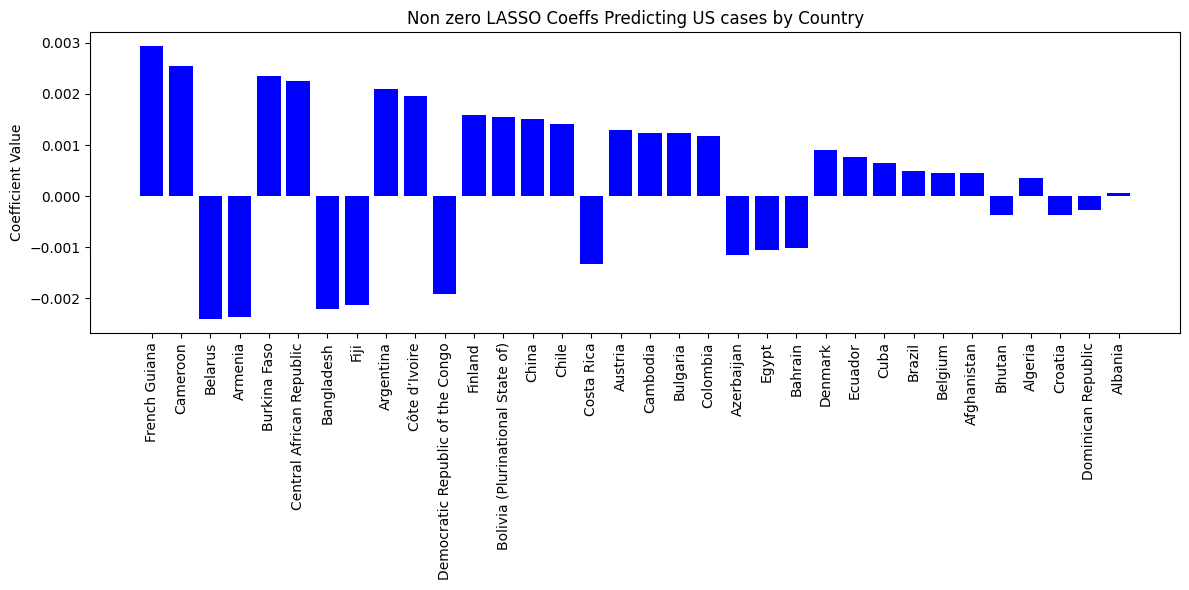

In [61]:
##MCANDREW x and y

#coefficients excluding intercept
coef_dict = {name: coef for name, coef in zip(X.columns, res.params) if name != 'const' and abs(coef) > 1e-8}

if not coef_dict:
    print("No non zero coefficients found with current threshold")
else:
    #sort values
    coef_dict = dict(sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True))

    print("Plotting coefficients:")
    for k, v in coef_dict.items():
        print(f"{k}: {v}")

    plt.figure(figsize=(12, 6))
    plt.bar(coef_dict.keys(), coef_dict.values(), color='blue')
    plt.xticks(rotation=90)
    plt.ylabel('Coefficient Value')
    plt.title('Non zero LASSO Coeffs Predicting US cases by Country')
    plt.tight_layout()
    plt.show()

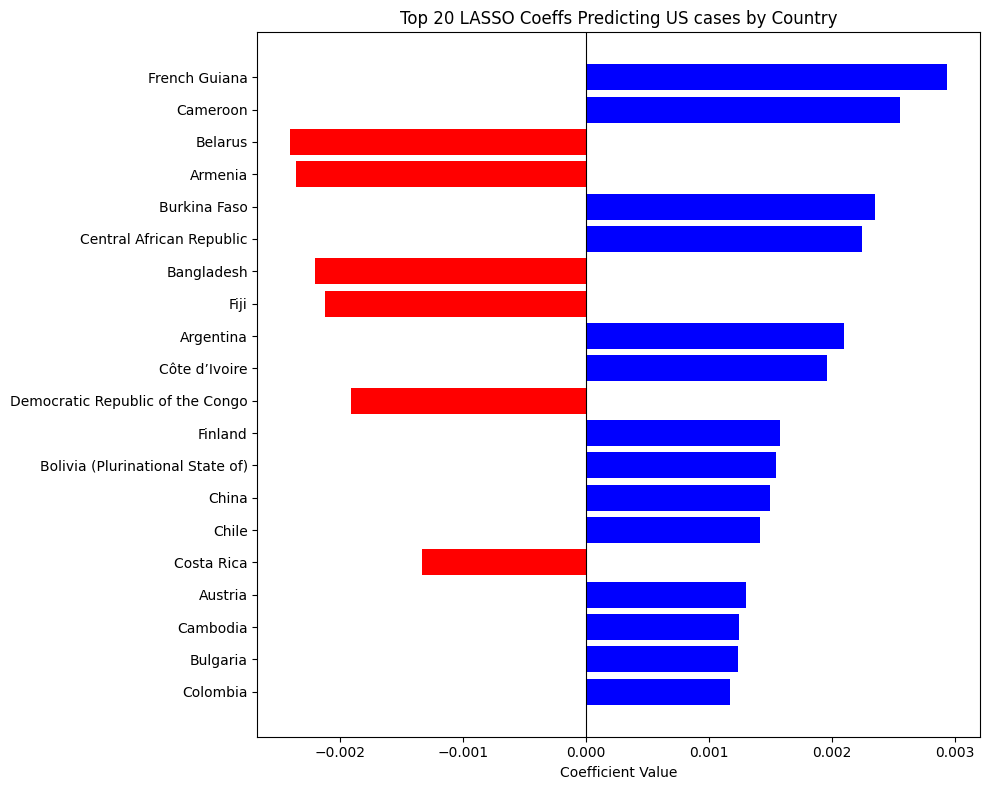

In [60]:
##MONELLI visual

#dictionary of non zero excluding intercept
coef_dict = {
    name: coef
    for name, coef in zip(X.columns, res.params)
    if name != 'const' and abs(coef) > 1e-8
}

if not coef_dict:
    print("No non zero coeffs found - lower alpha")
else:
    ##sort by descending values, keep top 20
    sorted_coefs = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:20]
    names, coefs = zip(*sorted_coefs)

    #blue for positive, red for negative
    colors = ['blue' if c > 0 else 'red' for c in coefs]

    # Plot horizontal bar chart
    plt.figure(figsize=(10, 8))
    y_pos = np.arange(len(names))
    plt.barh(y_pos, coefs, color=colors)
    plt.yticks(y_pos, names)
    plt.axvline(0, color='black', linewidth=0.8)  # zero line
    plt.xlabel('Coefficient Value')
    plt.title('Top 20 LASSO Coeffs Predicting US cases by Country')
    plt.gca().invert_yaxis()  # largest on top
    plt.tight_layout()
    plt.show()